In [1]:
# Data Importing
import DataLib as dlib
import NNLib as nlib
import numpy as np
import random
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data = np.array(dlib.DataLib('iris_num.data').matrix)

In [3]:
class NeuralNet:
    def __init__(self,data,batchSize,K):
        np.random.seed(1)
        self.data = data
        self.nbInstances = data.shape[0];
        self.nbFeatures  = data.shape[1];
        self.batchSize = batchSize;
        self.nbClasses = K;
        self.trainingSize = int(self.nbInstances*0.75);
        self.testingSize  = self.nbInstances-self.trainingSize;
        self.trainingData = np.zeros((self.trainingSize,self.nbFeatures))
        self.testingData = np.zeros((self.testingSize,self.nbFeatures))
        
        for i in range(self.trainingSize):
            for j in range(self.nbFeatures):
                self.trainingData[i][j] = data[i][j]
        for i in range(self.testingSize):
            for j in range(self.nbFeatures):
                self.testingData[i][j] = data[i+self.trainingSize][j]
        self.X_train = np.zeros((self.nbFeatures-1,self.batchSize))
        self.Y_train = np.zeros((self.nbClasses,self.batchSize))

        self.X_test  = np.zeros((self.nbFeatures-1,self.batchSize))
        self.Y_test  = np.zeros((self.nbClasses,self.batchSize))
        
        self.W1 = np.random.randn(3,4)*0.01
        self.b1 = np.zeros((3,1))

        self.W2 = np.random.randn(3,3)*0.1
        self.b2 = np.zeros((3,1))
    
    def createOneHot(self,labels,K):
        Y = np.zeros((K,len(labels)))
        for j in range(Y.shape[1]):
            Y[:,j][int(labels[j])]=1
        return Y
    def loadAttributesAndLabels(self,dataSet,index,batchSize,K):
        i = 0
        labels = []
        if(index+batchSize > self.trainingSize):
            batchSize = batchSize-self.trainingSize%batchSize-1
        X = np.zeros((self.nbFeatures-1,batchSize))
        for j in range(index,index+batchSize):
            X[:,i] = dataSet[:,:-1][j]
            labels.append(dataSet[j][-1])
            i = i + 1
        Y = self.createOneHot(labels,K)
        return X,Y
    def shuffleTrainingData(self):
        random.seed(42)
        for i in range(len(self.trainingData)-1,-1,-1):
            n = random.randint(0,i)
            value = self.trainingData[i].copy()
            self.trainingData[i] = self.trainingData[n]
            self.trainingData[n] = value
    def forward_prop(self,input_data):
        Z1 = np.dot(self.W1,input_data) + self.b1
        A1 = nlib.relu(Z1)
        Z2 = np.dot(self.W2,A1)+self.b2
        A2 = nlib.softmax_matricial(Z2)
        return Z1,A1,Z2,A2
    def trainingEpoch(self,training_input_data,training_output_data):
        Z1,A1,Z2,A2 = self.forward_prop(training_input_data)
        training_error = nlib.crossEntropy(A2,training_output_data)
        Delta2 = A2 - training_output_data
        dW2 = 1.0/A2.shape[1]*np.dot(Delta2,A1.T)
        db2 = 1.0/A2.shape[1]*np.sum(Delta2,axis=1,keepdims=True)
        Delta1 = np.dot(self.W2,Delta2)*nlib.reluDeriv_matricial(Z1)
        dW1 = 1.0/A1.shape[1]*np.dot(Delta1,training_input_data.T)
        db1 = 1.0/A1.shape[1]*np.sum(Delta1,axis=1,keepdims=True)
        
        self.W1 = self.W1 - 0.015 * dW1
        self.b1 = self.b1 - 0.015 * db1
        
        self.W2 = self.W2 - 0.015 * dW2
        self.b2 = self.b2 - 0.015 * db2
        
        return training_error
    def train(self,nbEpoch):
        f = open("training.out", "w")
        f.write('#Epoch'+"\t"+'Training Error'+'\n')
        train_list = []
        for one_epoch in range(nbEpoch):
            self.shuffleTrainingData()
            print("[Epoch: {}]".format(one_epoch))
            index = 0
            num_batches = math.ceil(self.trainingSize/self.batchSize)
            traines = []
            for i in range(num_batches):
                X_train,Y_train = self.loadAttributesAndLabels(self.data,index,self.batchSize,self.nbClasses)
                index+=self.batchSize
                training_error = self.trainingEpoch(X_train,Y_train)
                traines.append(training_error)
            train_list.append(np.mean(traines))
            trainingProgress = str(one_epoch)+"\t"+str(np.mean(traines))+'\n'
            f.write(trainingProgress)
            
        plt.xlabel('Epoch')
        plt.ylabel('Cross-Entropy Loss')
        plt.title('Model error as a function of training epoch')
        plt.grid(color='black', ls = '-.', lw = 0.25)
        plt.plot(train_list)
        plt.show()
    def test_prediction(self):
        X_test,Y_test = self.loadAttributesAndLabels(self.testingData,0,self.testingSize,self.nbClasses)
        _,_,_,Yhat = self.forward_prop(X_test)
        testing_error = nlib.crossEntropy(Yhat,Y_test)
        return nlib.checkAccuracy(Y_test,Yhat)

[Epoch: 0]
[Epoch: 1]
[Epoch: 2]
[Epoch: 3]
[Epoch: 4]
[Epoch: 5]
[Epoch: 6]
[Epoch: 7]
[Epoch: 8]
[Epoch: 9]
[Epoch: 10]
[Epoch: 11]
[Epoch: 12]
[Epoch: 13]
[Epoch: 14]
[Epoch: 15]
[Epoch: 16]
[Epoch: 17]
[Epoch: 18]
[Epoch: 19]
[Epoch: 20]
[Epoch: 21]
[Epoch: 22]
[Epoch: 23]
[Epoch: 24]
[Epoch: 25]
[Epoch: 26]
[Epoch: 27]
[Epoch: 28]
[Epoch: 29]
[Epoch: 30]
[Epoch: 31]
[Epoch: 32]
[Epoch: 33]
[Epoch: 34]
[Epoch: 35]
[Epoch: 36]
[Epoch: 37]
[Epoch: 38]
[Epoch: 39]
[Epoch: 40]
[Epoch: 41]
[Epoch: 42]
[Epoch: 43]
[Epoch: 44]
[Epoch: 45]
[Epoch: 46]
[Epoch: 47]
[Epoch: 48]
[Epoch: 49]
[Epoch: 50]
[Epoch: 51]
[Epoch: 52]
[Epoch: 53]
[Epoch: 54]
[Epoch: 55]
[Epoch: 56]
[Epoch: 57]
[Epoch: 58]
[Epoch: 59]
[Epoch: 60]
[Epoch: 61]
[Epoch: 62]
[Epoch: 63]
[Epoch: 64]
[Epoch: 65]
[Epoch: 66]
[Epoch: 67]
[Epoch: 68]
[Epoch: 69]
[Epoch: 70]
[Epoch: 71]
[Epoch: 72]
[Epoch: 73]
[Epoch: 74]
[Epoch: 75]
[Epoch: 76]
[Epoch: 77]
[Epoch: 78]
[Epoch: 79]
[Epoch: 80]
[Epoch: 81]
[Epoch: 82]
[Epoch: 83]
[E

[Epoch: 663]
[Epoch: 664]
[Epoch: 665]
[Epoch: 666]
[Epoch: 667]
[Epoch: 668]
[Epoch: 669]
[Epoch: 670]
[Epoch: 671]
[Epoch: 672]
[Epoch: 673]
[Epoch: 674]
[Epoch: 675]
[Epoch: 676]
[Epoch: 677]
[Epoch: 678]
[Epoch: 679]
[Epoch: 680]
[Epoch: 681]
[Epoch: 682]
[Epoch: 683]
[Epoch: 684]
[Epoch: 685]
[Epoch: 686]
[Epoch: 687]
[Epoch: 688]
[Epoch: 689]
[Epoch: 690]
[Epoch: 691]
[Epoch: 692]
[Epoch: 693]
[Epoch: 694]
[Epoch: 695]
[Epoch: 696]
[Epoch: 697]
[Epoch: 698]
[Epoch: 699]
[Epoch: 700]
[Epoch: 701]
[Epoch: 702]
[Epoch: 703]
[Epoch: 704]
[Epoch: 705]
[Epoch: 706]
[Epoch: 707]
[Epoch: 708]
[Epoch: 709]
[Epoch: 710]
[Epoch: 711]
[Epoch: 712]
[Epoch: 713]
[Epoch: 714]
[Epoch: 715]
[Epoch: 716]
[Epoch: 717]
[Epoch: 718]
[Epoch: 719]
[Epoch: 720]
[Epoch: 721]
[Epoch: 722]
[Epoch: 723]
[Epoch: 724]
[Epoch: 725]
[Epoch: 726]
[Epoch: 727]
[Epoch: 728]
[Epoch: 729]
[Epoch: 730]
[Epoch: 731]
[Epoch: 732]
[Epoch: 733]
[Epoch: 734]
[Epoch: 735]
[Epoch: 736]
[Epoch: 737]
[Epoch: 738]
[Epoch: 739]

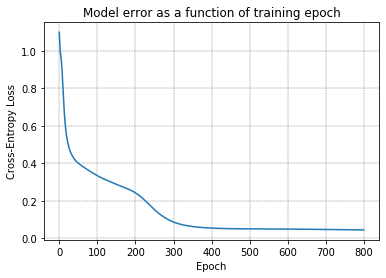

Mode (test) accuracy is 0.97


In [4]:
nn = NeuralNet(data = data , batchSize = 4 , K = 3)
nn.train(800)
model_accuracy = nn.test_prediction()
print("Mode (test) accuracy is %.2f" %model_accuracy)